In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/wine-dataset-for-clustering/wine-clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = data.iloc[:,0:10]

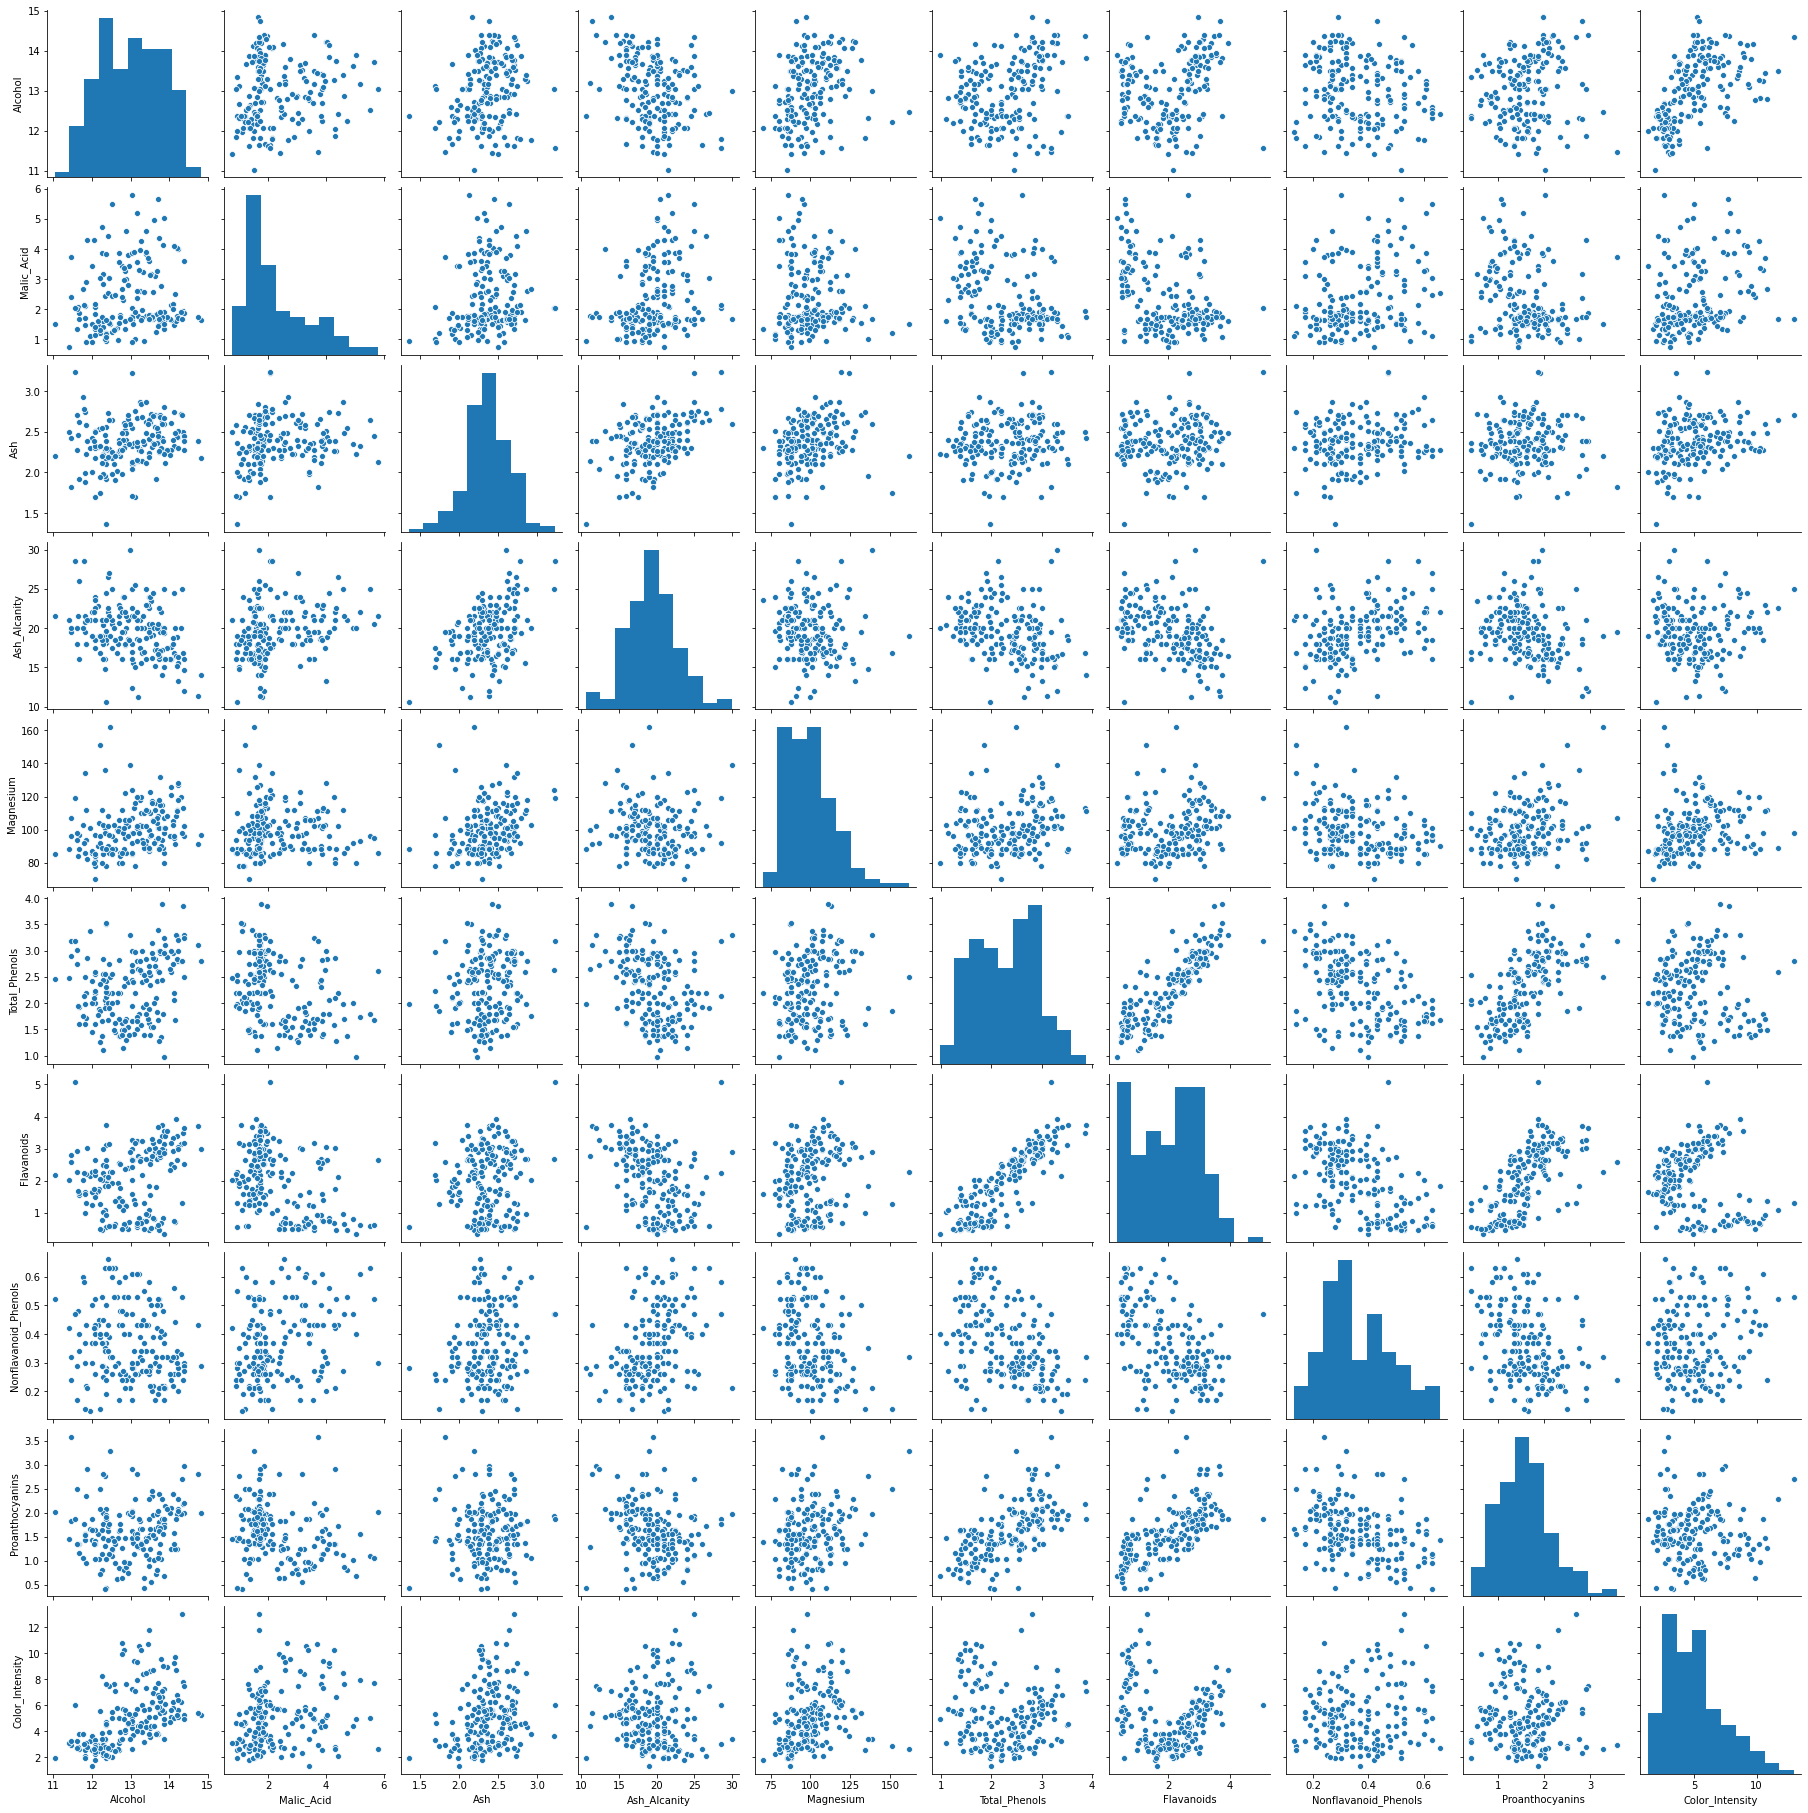

In [4]:
sns.pairplot(df)

In [5]:
array = np.array(df)
array

array([[14.23,  1.71,  2.43, ...,  0.28,  2.29,  5.64],
       [13.2 ,  1.78,  2.14, ...,  0.26,  1.28,  4.38],
       [13.16,  2.36,  2.67, ...,  0.3 ,  2.81,  5.68],
       ...,
       [13.27,  4.28,  2.26, ...,  0.43,  1.35, 10.2 ],
       [13.17,  2.59,  2.37, ...,  0.53,  1.46,  9.3 ],
       [14.13,  4.1 ,  2.74, ...,  0.56,  1.35,  9.2 ]])

In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
scaled_data = mm.fit_transform(array)
scaled_data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.28301887, 0.59305994,
        0.37201365],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.24528302, 0.27444795,
        0.26450512],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.32075472, 0.75709779,
        0.37542662],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.56603774, 0.29652997,
        0.76109215],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.75471698, 0.33123028,
        0.68430034],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.81132075, 0.29652997,
        0.67576792]])

In [8]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386


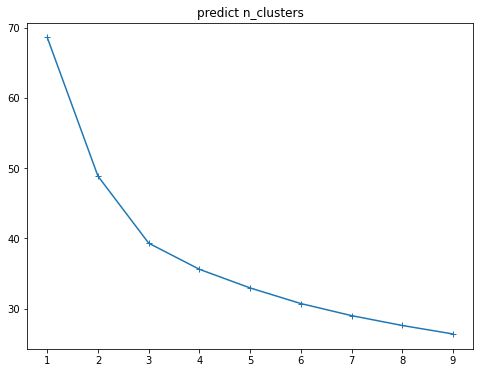

In [9]:
from sklearn.cluster import KMeans
ints=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    ints.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="+")
plt.title("predict n_clusters")
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [11]:
kmeans.cluster_centers_

array([[0.32724458, 0.23392816, 0.46594841, 0.47331716, 0.25623402,
        0.41049696, 0.33795607, 0.44644839, 0.35971423, 0.14914174],
       [0.56354983, 0.53195694, 0.578109  , 0.56679096, 0.31336725,
        0.23961849, 0.09556513, 0.60899237, 0.23847238, 0.52666836],
       [0.69156224, 0.24201644, 0.58653765, 0.36172476, 0.40303658,
        0.65944171, 0.57085929, 0.29979036, 0.48635522, 0.35691262]])

In [12]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [13]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [14]:
data.drop(['Color_Intensity', 'Hue', 'OD280', 'Proline'], axis=1, inplace=True)

In [15]:
data['cluster'] = kmeans.labels_

In [16]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,2
...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,1


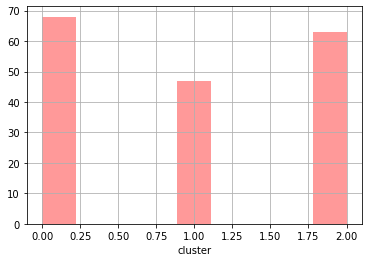

In [17]:
sns.distplot(data['cluster'], kde=False, bins=9, color='red')
plt.grid();

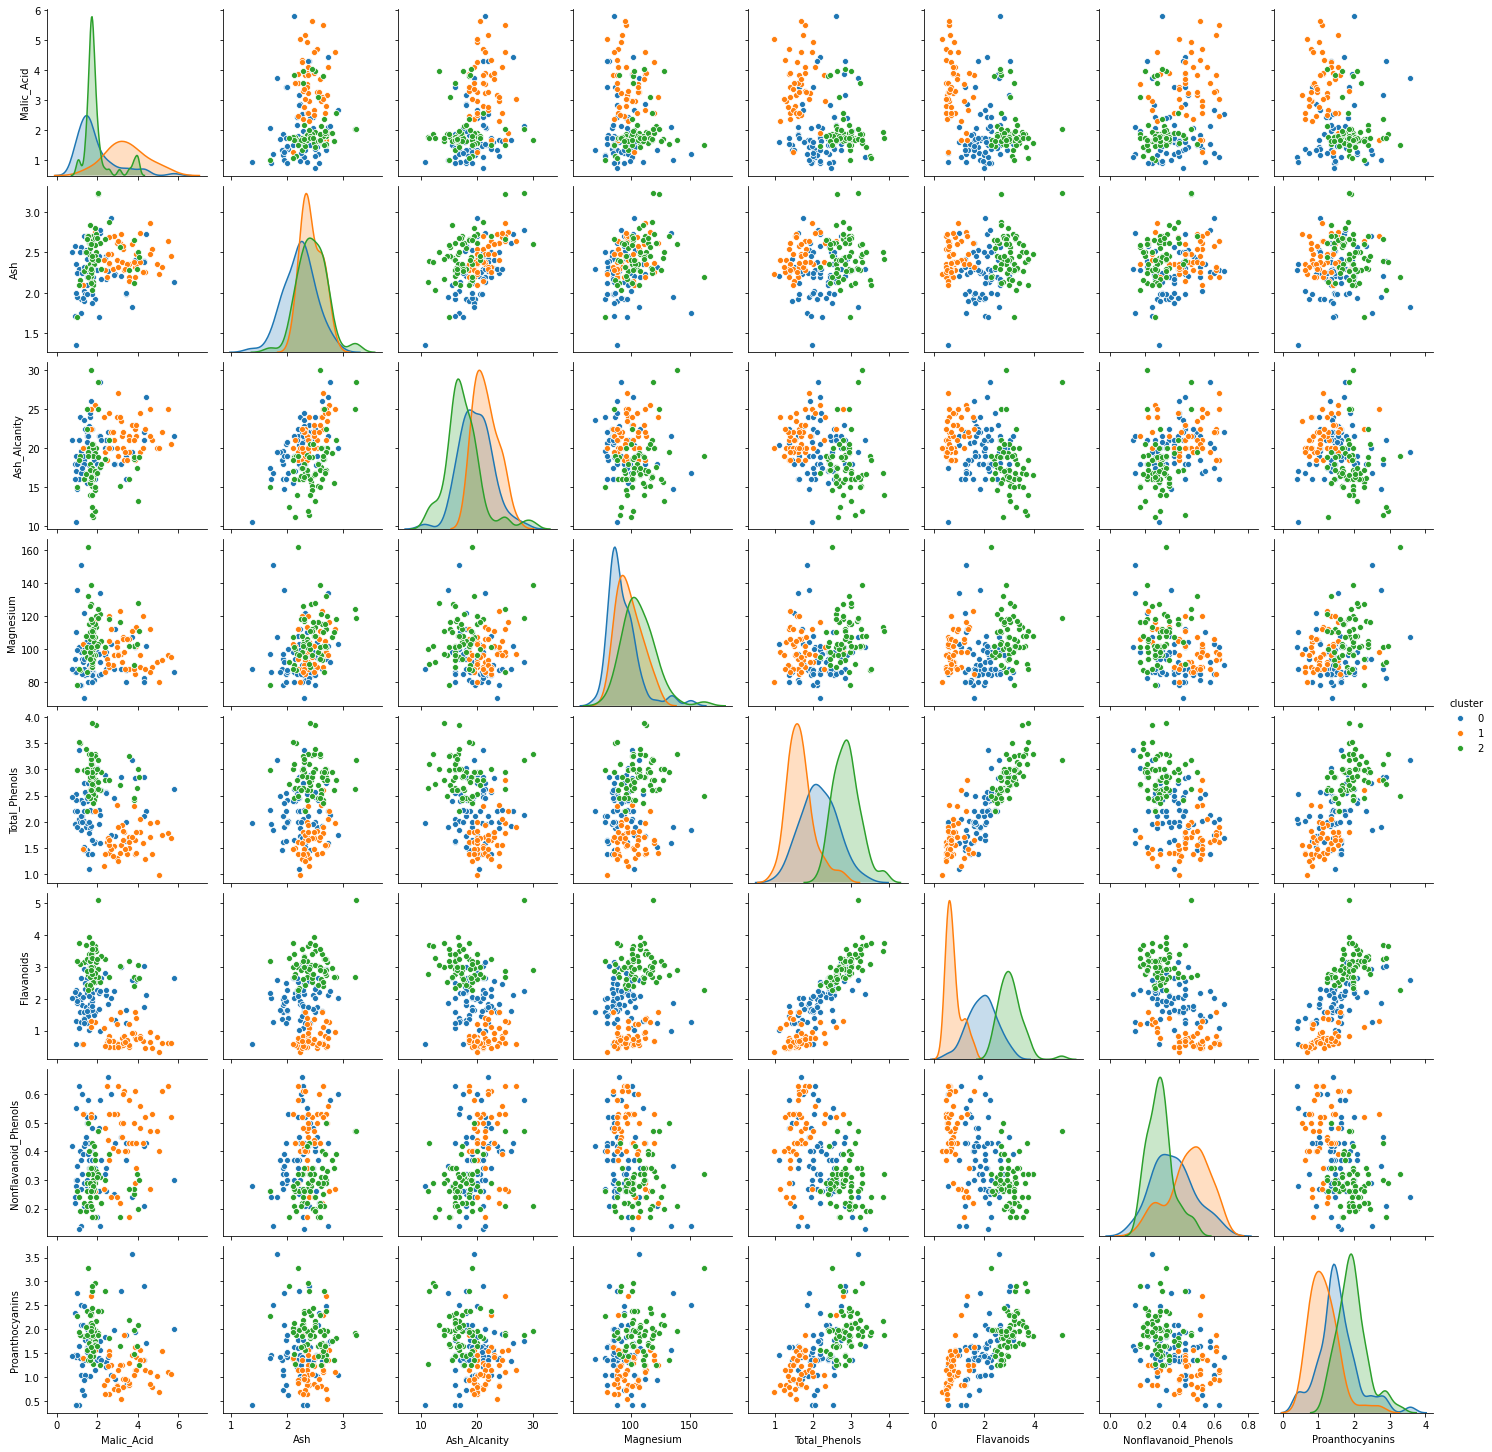

In [18]:
sns.pairplot(data.iloc[:,1:10], hue='cluster', height=2.5);